<a href="https://colab.research.google.com/github/LKVan/Lab2_ML/blob/van/Lab_4_20130462_LeKhanhVan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Lab4'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML_Lab4


# Import libraries

In [16]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [8]:
# code
data4 = datasets.load_iris()
X = data4.data
y = data4.target
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, train_size=0.7,
random_state=None, shuffle=True, stratify=None)

Confusion Matrix : 
 [[17  0  0]
 [ 0 12  0]
 [ 0  1 15]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


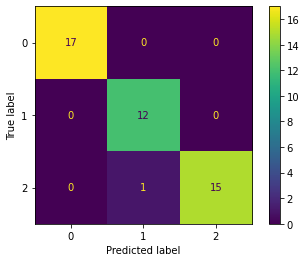

In [9]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



Confusion Matrix : 
 [[48  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 0  1 49  1  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 66  0  0  0  0  0]
 [ 0  1  0  0  1 47  1  0  0  1]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  1  0  0 60  0  0]
 [ 0  5  1  0  0  2  0  0 49  1]
 [ 0  1  0  0  0  1  0  0  2 40]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


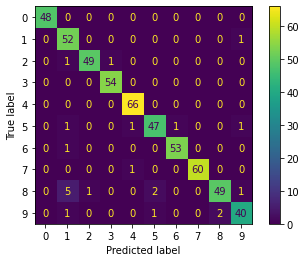

In [ ]:
# code
mnist = datasets.load_digits()
X2 = mnist.data
Y2 = mnist.target

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,Y2, test_size=0.3, train_size=0.7,
random_state=None, shuffle=True, stratify=None)

classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(x_train2, y_train2)

y_pred2 = classifier2.predict(x_test2)

cm2 = confusion_matrix(y_test2, y_pred2)
print ("Confusion Matrix : \n", cm2)
ConfusionMatrixDisplay.from_predictions(y_test2, y_pred2)

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


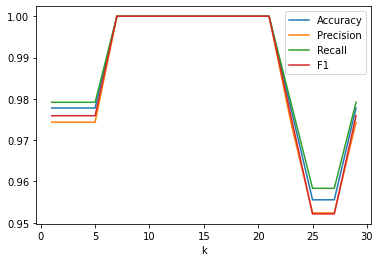

In [11]:
# code
k_range = range(1,30,2)
accs = []
pres = []
recall = []
f1s = []
for k in k_range:
  kNN = KNeighborsClassifier(n_neighbors= k)
  kNN.fit(x_train,y_train)
  y_pred = kNN.predict(x_test)
  accs.append(metrics.accuracy_score(y_test,y_pred))
  pres.append(metrics.precision_score(y_test,y_pred,average='macro'))
  recall.append(metrics.recall_score(y_test,y_pred,average='macro'))
  f1s.append(metrics.f1_score(y_test,y_pred,average='macro'))
plt.plot(k_range,accs,label='Accuracy')
plt.plot(k_range,pres,label='Precision')
plt.plot(k_range,recall,label='Recall')
plt.plot(k_range,f1s,label='F1')
plt.xlabel("k")
plt.legend()
plt.show()

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


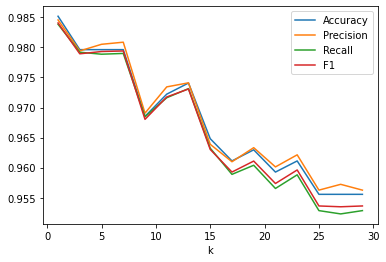

In [ ]:
# code
k_range2 = range(1,30,2)
accs2 = []
pres2 = []
recall2 = []
f1s2 = []
for k in k_range2:
  kNN2 = KNeighborsClassifier(n_neighbors= k)
  kNN2.fit(x_train2,y_train2)
  y_pred2 = kNN2.predict(x_test2)
  accs2.append(metrics.accuracy_score(y_test2,y_pred2))
  pres2.append(metrics.precision_score(y_test2,y_pred2,average='macro'))
  recall2.append(metrics.recall_score(y_test2,y_pred2,average='macro'))
  f1s2.append(metrics.f1_score(y_test2,y_pred2,average='macro'))
plt.plot(k_range2,accs2,label='Accuracy')
plt.plot(k_range2,pres2,label='Precision')
plt.plot(k_range2,recall2,label='Recall')
plt.plot(k_range2,f1s2,label='F1')
plt.xlabel("k")
plt.legend()

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [53]:
# code
data = pd.read_csv('spambase.csv')
data.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data['class'], test_size=0.3, train_size=0.7,
random_state=None, shuffle=True, stratify=None)
accs = []
pres = []
recalls = []
f1s = []

In [54]:
# LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred1 = classifier.predict(x_test)

accuracy1 = metrics.accuracy_score(y_test,y_pred1)
precision1 = metrics.precision_score(y_test,y_pred1,average='macro')
recall1 = metrics.recall_score(y_test,y_pred1,average='macro')
f11 = metrics.f1_score(y_test,y_pred1,average='macro')

accs.append(accuracy1)
pres.append(precision1)
recalls.append(recall1)
f1s.append(f11)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# kNN
kNN = KNeighborsClassifier(n_neighbors= 3)
kNN.fit(x_train,y_train)
y_pred2 = kNN.predict(x_test)

accuracy2 = metrics.accuracy_score(y_test,y_pred2)
precision2 = metrics.precision_score(y_test,y_pred2,average='macro')
recall2 = metrics.recall_score(y_test,y_pred2,average='macro')
f12 = metrics.f1_score(y_test,y_pred2,average='macro')

accs.append(accuracy2)
pres.append(precision2)
recalls.append(recall2)
f1s.append(f12)

In [56]:
# Decision tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,
max_depth=3, min_samples_leaf=5)
clf_model.fit(x_train,y_train)

# Predict X_test
y_pred3 = clf_model.predict(x_test)

accuracy3 = metrics.accuracy_score(y_test,y_pred3)
precision3 = metrics.precision_score(y_test,y_pred3,average='macro')
recall3 = metrics.recall_score(y_test,y_pred3,average='macro')
f13 = metrics.f1_score(y_test,y_pred3,average='macro')

accs.append(accuracy3)
pres.append(precision3)
recalls.append(recall3)
f1s.append(f13)

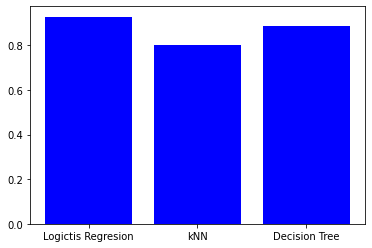

In [58]:
# Accuracy
name = ['Logictis Regresion','kNN','Decision Tree']
plt.bar(name,accs,color='blue')
plt.show()

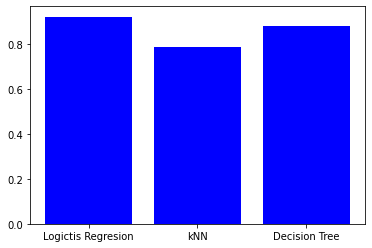

In [59]:
# Precision
name = ['Logictis Regresion','kNN','Decision Tree']
plt.bar(name,pres,color='blue')
plt.show()

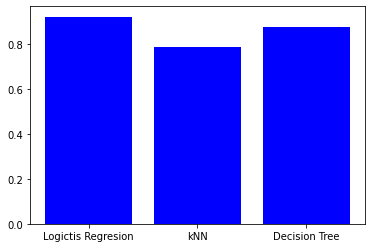

In [60]:
# Recall
name = ['Logictis Regresion','kNN','Decision Tree']
plt.bar(name,recalls,color='blue')
plt.show()

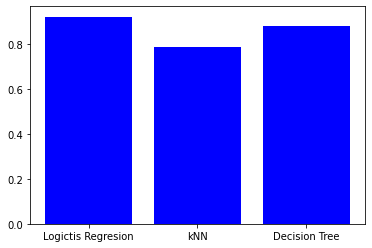

In [61]:
# F1
name = ['Logictis Regresion','kNN','Decision Tree']
plt.bar(name,f1s,color='blue')
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.